BRAIN TUMOR PROJECT

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np
from torchvision import datasets,transforms

In [2]:
from PIL import Image
from IPython.display import display
import os

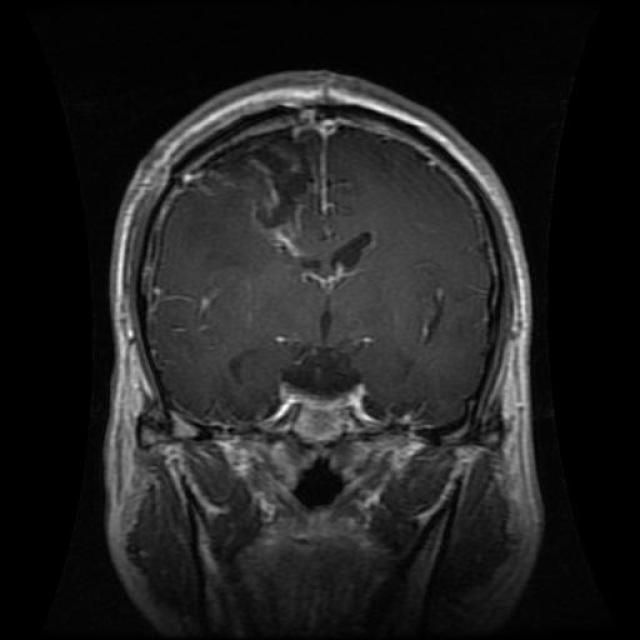

In [3]:
with Image.open(r'C:\codes\Tumour\train\glioma\Tr-gl_0013_jpg.rf.312d7ef8d55655cbf02c4143dfef3788.jpg') as img:
    display(img)

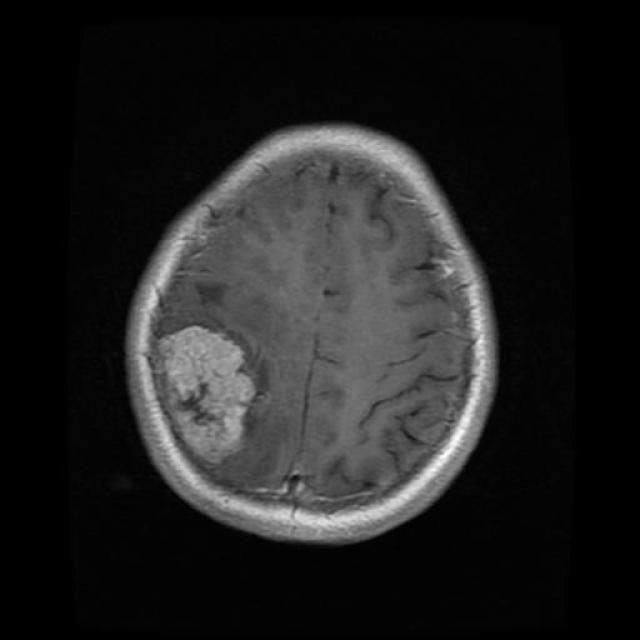

In [5]:
with Image.open(r"C:\codes\Tumour\train\meningioma\Tr-me_0011_jpg.rf.c039f84f918b11f4a74316cd5bb2c231.jpg") as img:
    display(img)

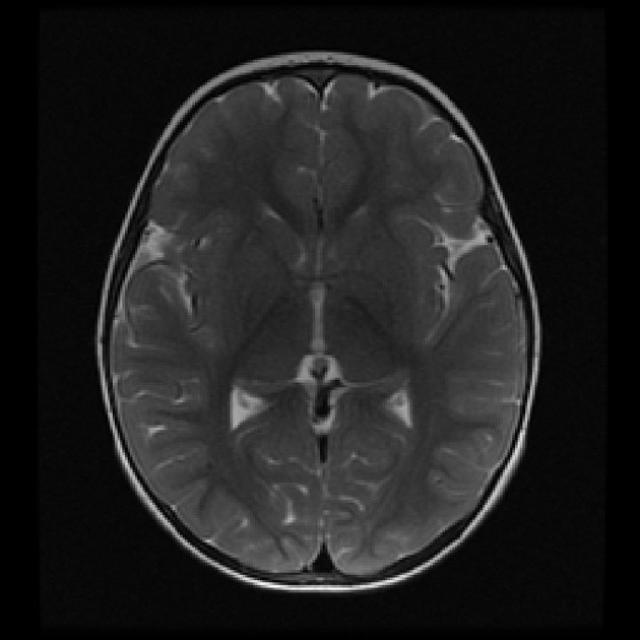

In [6]:
with Image.open(r"C:\codes\Tumour\train\no_tumor\Tr-no_0013_jpg.rf.ba75dd083e4c092e31fd59db1a7de9dc.jpg") as img:
    display(img)

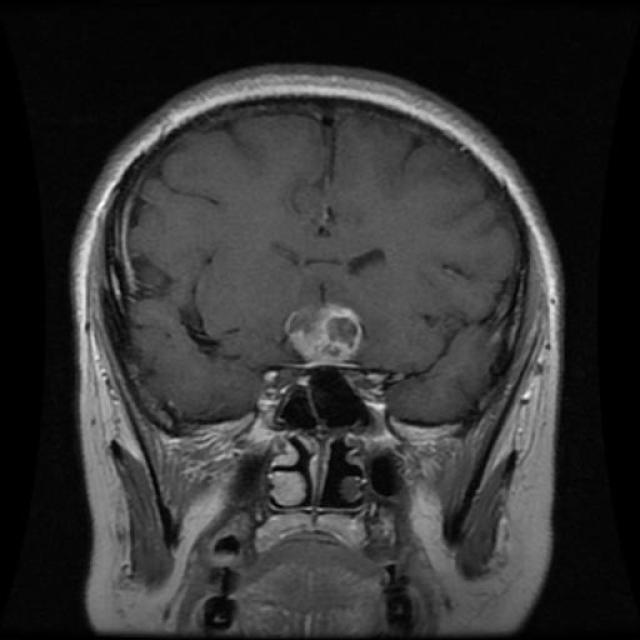

In [7]:
with Image.open(r"C:\codes\Tumour\train\pituitary\Tr-pi_0010_jpg.rf.caed12ef1e5fad2e91a79e5773efc0bb.jpg") as img:
    display(img)

In [4]:
image_names = []
path = 'Tumour/train'

for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.jpg'):
            image_names.append(os.path.join(root, file))

In [5]:
len(image_names)
print(image_names[:5])  # Display first 5 image paths

['Tumour/train\\glioma\\Tr-gl_0011_jpg.rf.61e213cb5a0f97fedd1bacd0428c0133.jpg', 'Tumour/train\\glioma\\Tr-gl_0013_jpg.rf.312d7ef8d55655cbf02c4143dfef3788.jpg', 'Tumour/train\\glioma\\Tr-gl_0014_jpg.rf.1c9a1de19711c94e45210faa7473b26a.jpg', 'Tumour/train\\glioma\\Tr-gl_0015_jpg.rf.13077910f13033d4bbdedda8b91cb48e.jpg', 'Tumour/train\\glioma\\Tr-gl_0016_jpg.rf.85a74661631af6d62d25e50e62d34c95.jpg']


In [6]:
img_sizes = []
for img_path in image_names:
    with Image.open(img_path) as img:
        img_sizes.append(img.size)

In [7]:
df = pd.DataFrame(img_sizes, columns=['width', 'height'])
df.head(30)

,width,height
0,640,640
1,640,640
2,640,640
3,640,640
4,640,640
5,640,640
6,640,640
7,640,640
8,640,640
9,640,640


In [8]:
df['width'].describe()

count    1695.0
mean      640.0
std         0.0
min       640.0
25%       640.0
50%       640.0
75%       640.0
max       640.0
Name: width, dtype: float64

In [9]:
df['height'].describe()

count    1695.0
mean      640.0
std         0.0
min       640.0
25%       640.0
50%       640.0
75%       640.0
max       640.0
Name: height, dtype: float64

(640, 640)


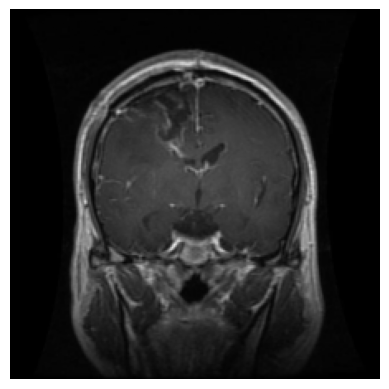

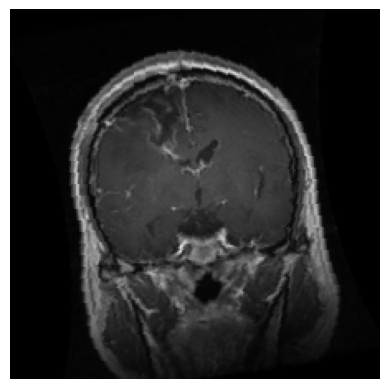

torch.Size([3, 224, 224])


In [10]:
img = Image.open(r'C:\codes\Tumour\train\glioma\Tr-gl_0013_jpg.rf.312d7ef8d55655cbf02c4143dfef3788.jpg')
print(img.size)
# If you want to use a new transform pipeline, use a different variable name
my_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
my_transform2 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])
img_tensor = my_transform(img)
img_tensor2 = my_transform2(img)
plt.imshow(np.transpose(img_tensor.numpy(), (1, 2, 0)))
plt.axis('off')
plt.show()
plt.imshow(np.transpose(img_tensor2.numpy(), (1, 2, 0)))
plt.axis('off')
plt.show()
print(img_tensor2.shape)

In [11]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomAffine(5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [12]:
RandomSeed = 24
torch.manual_seed(RandomSeed)
train_set = datasets.ImageFolder(
    root = 'Tumour/train',
    transform = train_transform
)
test_set = datasets.ImageFolder(
    root = 'Tumour/valid',
    transform = test_transform
)
train_loader = DataLoader(
    dataset = train_set,
    batch_size = 10,
    shuffle = True
)
test_loader = DataLoader(
    dataset = test_set,
    batch_size = 10,
    shuffle = False
)

In [13]:
class_names = train_set.classes
print(class_names)

['glioma', 'meningioma', 'no_tumor', 'pituitary']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.4199566].


torch.Size([10, 3, 224, 224])
torch.Size([10])
glioma
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


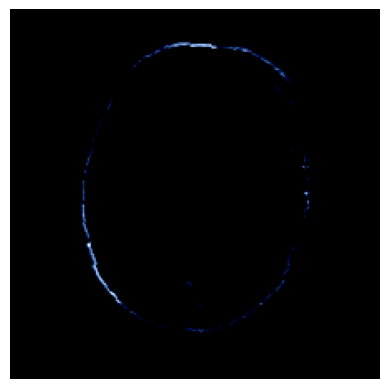

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.9602616].


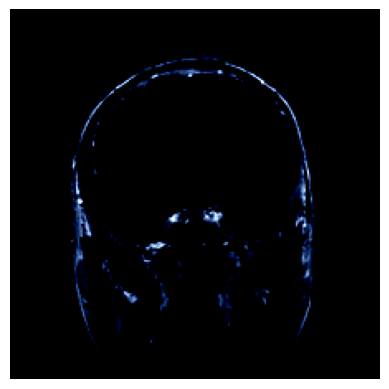

In [14]:
for images,labels in train_loader:
    print(images.shape)
    print(labels.shape)
    break
for images1,labels in test_loader:
    break
print(class_names[labels[7]])
print(labels)
plt.imshow(np.transpose(images[0].numpy(), (1, 2, 0)))
plt.axis('off')
plt.show()
plt.imshow(np.transpose(images1[0].numpy(), (1, 2, 0)))
plt.axis('off')
plt.show()

In [45]:
class CNN(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1)
        self.bn5 = nn.BatchNorm2d(512)
        self.dropout = nn.Dropout(0.3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Calculate the output size after 5 conv+pool layers for input 3x224x224
        # 224 -> 222 -> 111 -> 109 -> 54 -> 52 -> 26 -> 24 -> 12 -> 10 -> 5
        self.fc1 = nn.Linear(512 * 5 * 5, 256)
        self.bn_fc1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn_fc2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn_fc3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.pool(F.relu(self.bn5(self.conv5(x))))
        x = x.view(x.size(0), -1)
        x = F.relu(self.bn_fc1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn_fc2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn_fc3(self.fc3(x)))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

model = CNN(num_classes=len(class_names))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (bn5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12800, out_features=256, bias=True)
  (bn_fc1): BatchNorm1d(256, eps=1e-05, moment

Epoch [1/100], Train Loss: 1.0806, Test Loss: 0.7958
Test Accuracy: 78.88% train accuracy: 78.88%
Epoch [2/100], Train Loss: 0.8453, Test Loss: 0.6733
Test Accuracy: 80.48% train accuracy: 80.48%
Epoch [3/100], Train Loss: 0.7433, Test Loss: 0.5945
Test Accuracy: 83.27% train accuracy: 83.27%
Epoch [4/100], Train Loss: 0.6465, Test Loss: 0.6427
Test Accuracy: 78.29% train accuracy: 78.29%
Epoch [5/100], Train Loss: 0.6034, Test Loss: 0.4848
Test Accuracy: 85.06% train accuracy: 85.06%
Epoch [6/100], Train Loss: 0.5588, Test Loss: 0.4367
Test Accuracy: 87.05% train accuracy: 87.05%
Epoch [7/100], Train Loss: 0.5011, Test Loss: 0.3919
Test Accuracy: 89.84% train accuracy: 89.84%
Epoch [8/100], Train Loss: 0.4568, Test Loss: 0.4177
Test Accuracy: 88.65% train accuracy: 88.65%
Epoch [9/100], Train Loss: 0.4317, Test Loss: 0.3489
Test Accuracy: 89.44% train accuracy: 89.44%
Epoch [10/100], Train Loss: 0.4044, Test Loss: 0.3530
Test Accuracy: 89.24% train accuracy: 89.24%
Epoch [11/100], Tra

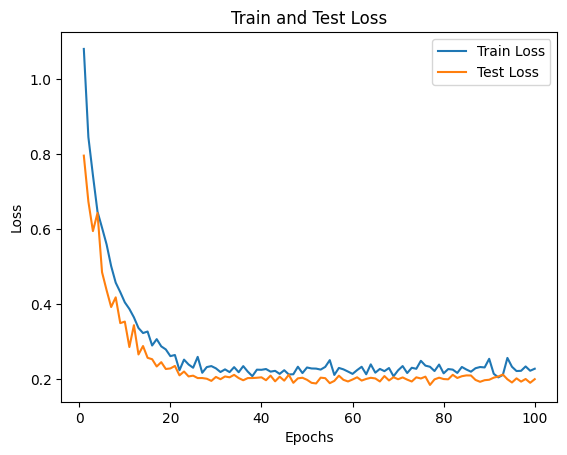

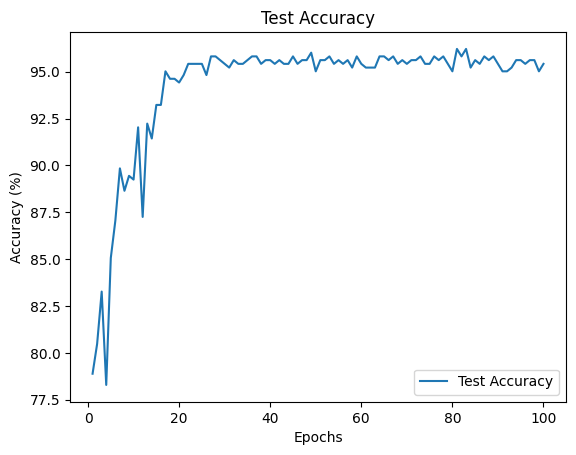

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=0, factor=0.7)

def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss
def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(test_loader.dataset)
    return epoch_loss
num_epochs = 100
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_loss = evaluate(model, test_loader, criterion, device)
    scheduler.step(test_loss)  # for ReduceLROnPlateau
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)
    print(f'Test Accuracy: {accuracy:.2f}%',
          f'train accuracy: {100 * correct / total:.2f}%')
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss')
plt.legend()
plt.show()
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..0.8622224].


torch.Size([3, 224, 224])


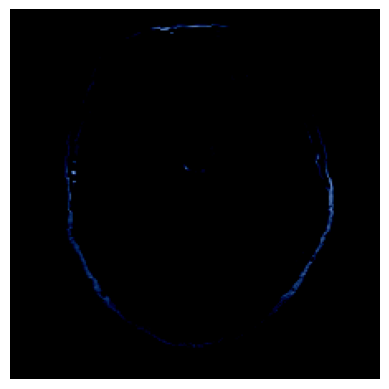

In [21]:
img3 = Image.open(r"C:\codes\Tumour\test\pituitary\Tr-pi_0646_jpg.rf.d3e36be566da199204d83608fc892ec0.jpg")
img3_tensor = train_transform(img3)
print(img3_tensor.shape)  # Add batch dimension
plt.imshow(np.transpose(img3_tensor.numpy(), (1, 2, 0)))
plt.axis('off')
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    img3_tensor = img3_tensor.unsqueeze(0).to(device) 
    output = model(img3_tensor)
    _, predicted = torch.max(output, 1)
    predicted_class = class_names[predicted.item()]
    print(f'Predicted class: {predicted_class}')

Predicted class: pituitary


In [23]:
path = 'Tumour/test/glioma'
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for img_name in os.listdir(path):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(path, img_name)
            img = Image.open(img_path)
            img_tensor = test_transform(img).unsqueeze(0).to(device)
            output = model(img_tensor)
            _, predicted = torch.max(output, 1)
            predicted_class = class_names[predicted.item()]
            print(f'Image: {img_name}, Predicted class: {predicted_class}')
            if predicted_class == 'glioma':
                correct += 1
            total += 1
accuracy = 100 * correct / total if total > 0 else 0
print(f'Accuracy on glioma images: {accuracy:.2f}%')

Image: Tr-gl_0016_jpg.rf.99746694ea97fe0b73108832b462d48e.jpg, Predicted class: glioma
Image: Tr-gl_0018_jpg.rf.7a670766b8083a1b516a49e241a636bc.jpg, Predicted class: glioma
Image: Tr-gl_0028_jpg.rf.8098b9737048aac0dccb1b7c45046894.jpg, Predicted class: glioma
Image: Tr-gl_0032_jpg.rf.e1e485b4f909d84c8e24cd26e0ad3c08.jpg, Predicted class: glioma
Image: Tr-gl_0035_jpg.rf.7a7c96ab2e6245cf42a0c86b97f81b3e.jpg, Predicted class: glioma
Image: Tr-gl_0037_jpg.rf.6ac80086817a5d840d3b634956299e40.jpg, Predicted class: glioma
Image: Tr-gl_0040_jpg.rf.4e8e95e2b510b798b62954aa8d3e1847.jpg, Predicted class: glioma
Image: Tr-gl_0042_jpg.rf.c825249fca17c0579976c6455ed0f64d.jpg, Predicted class: glioma
Image: Tr-gl_0075_jpg.rf.687ed8298bed6c85cb35c9c8f3ecbe2d.jpg, Predicted class: glioma
Image: Tr-gl_0081_jpg.rf.cd6ff4a250465f60361ab931fe2cd91f.jpg, Predicted class: glioma
Image: Tr-gl_0084_jpg.rf.a44aa8130cb9e42053acb60cbc60cb1e.jpg, Predicted class: glioma
Image: Tr-gl_0086_jpg.rf.59bef0b3cef3bf10bf

In [24]:
path = 'Tumour/test/meningioma'
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for img_name in os.listdir(path):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(path, img_name)
            img = Image.open(img_path)
            img_tensor = test_transform(img).unsqueeze(0).to(device)
            output = model(img_tensor)
            _, predicted = torch.max(output, 1)
            predicted_class = class_names[predicted.item()]
            print(f'Image: {img_name}, Predicted class: {predicted_class}')
            if predicted_class == 'meningioma':
                correct += 1
            total += 1
accuracy = 100 * correct / total if total > 0 else 0
print(f'Accuracy on meningioma images: {accuracy:.2f}%')

Image: Tr-me_0010_jpg.rf.64b09cdfd6ad5f8352e473a7d3015dba.jpg, Predicted class: meningioma
Image: Tr-me_0035_jpg.rf.e4f21c06c7ce665e5258c3e0489185c5.jpg, Predicted class: meningioma
Image: Tr-me_0041_jpg.rf.fd18fa5bcabe05b6cdd3987743a49315.jpg, Predicted class: meningioma
Image: Tr-me_0044_jpg.rf.0223369274dd825d3ff27ace105f878f.jpg, Predicted class: meningioma
Image: Tr-me_0046_jpg.rf.fb1ef3480d81c1063299a7a2eb723411.jpg, Predicted class: meningioma
Image: Tr-me_0059_jpg.rf.a7ddf325d1b4508eb5e9048c5cb9133d.jpg, Predicted class: meningioma
Image: Tr-me_0060_jpg.rf.00fc106bc4d8afdd87385a496cc62c2c.jpg, Predicted class: meningioma
Image: Tr-me_0069_jpg.rf.332331a0dda2f9e803c7bff6ad5ae3eb.jpg, Predicted class: meningioma
Image: Tr-me_0084_jpg.rf.8da0909e5ac2b199b846a7b8a7ae18d0.jpg, Predicted class: meningioma
Image: Tr-me_0088_jpg.rf.e61e56a612e513fe2556d7a23c910913.jpg, Predicted class: meningioma
Image: Tr-me_0095_jpg.rf.6bfd18915c4925497a3d61dfcba79d6b.jpg, Predicted class: meningioma

In [25]:
path = 'Tumour/test/pituitary'
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for img_name in os.listdir(path):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(path, img_name)
            img = Image.open(img_path)
            img_tensor = test_transform(img).unsqueeze(0).to(device)
            output = model(img_tensor)
            _, predicted = torch.max(output, 1)
            predicted_class = class_names[predicted.item()]
            print(f'Image: {img_name}, Predicted class: {predicted_class}')
            if predicted_class == 'pituitary':
                correct += 1
            total += 1
accuracy = 100 * correct / total if total > 0 else 0
print(f'Accuracy on pituitary images: {accuracy:.2f}%')

Image: Tr-pi_0038_jpg.rf.50c4875c32834d727e1b02ce11ca571b.jpg, Predicted class: pituitary
Image: Tr-pi_0090_jpg.rf.c08e55649aa763919fefc64964f2e6b4.jpg, Predicted class: pituitary
Image: Tr-pi_0098_jpg.rf.eec9da587fa75dd9a461ef02380e8225.jpg, Predicted class: pituitary
Image: Tr-pi_0103_jpg.rf.e4149a2b693bbe8fe259acbefc31cfc0.jpg, Predicted class: pituitary
Image: Tr-pi_0115_jpg.rf.23b8edbb6cef3898b66019cb8d1c8127.jpg, Predicted class: pituitary
Image: Tr-pi_0130_jpg.rf.15adee5c88949e10f62a9c54294adaf9.jpg, Predicted class: pituitary
Image: Tr-pi_0134_jpg.rf.fe52bea9481b28a403f0436ab88dafee.jpg, Predicted class: pituitary
Image: Tr-pi_0151_jpg.rf.29da072b2854ac8013c749591d2fa269.jpg, Predicted class: pituitary
Image: Tr-pi_0158_jpg.rf.e934d7a11ed39795f78dba33bcbdd3d2.jpg, Predicted class: pituitary
Image: Tr-pi_0190_jpg.rf.9c11456c61516da0b1d588c401d6c9cf.jpg, Predicted class: pituitary
Image: Tr-pi_0192_jpg.rf.7a829f518629b0cc146ab2ce78f739ba.jpg, Predicted class: pituitary
Image: Tr-

In [26]:
path = 'Tumour/test/no_tumor'
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for img_name in os.listdir(path):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(path, img_name)
            img = Image.open(img_path)
            img_tensor = test_transform(img).unsqueeze(0).to(device)
            output = model(img_tensor)
            _, predicted = torch.max(output, 1)
            predicted_class = class_names[predicted.item()]
            print(f'Image: {img_name}, Predicted class: {predicted_class}')
            if predicted_class == 'no_tumor':
                correct += 1
            total += 1
accuracy = 100 * correct / total if total > 0 else 0
print(f'Accuracy on no_tumor images: {accuracy:.2f}%')

Image: Tr-no_0017_jpg.rf.2cedc1f6703d5a0b33b09208957d9223.jpg, Predicted class: no_tumor
Image: Tr-no_0022_jpg.rf.450e5c79c994c8f3ccfd6e41b45147b6.jpg, Predicted class: no_tumor
Image: Tr-no_0032_jpg.rf.1d31f39f4254f6f632457fe7cf03ceef.jpg, Predicted class: no_tumor
Image: Tr-no_0043_jpg.rf.5224aefedc2bd0860814754ea61bb631.jpg, Predicted class: no_tumor
Image: Tr-no_0049_jpg.rf.ebfa4b818a60023078468e4a497d6b32.jpg, Predicted class: no_tumor
Image: Tr-no_0055_jpg.rf.f1be184ee2cee634dd82670955bfba81.jpg, Predicted class: no_tumor
Image: Tr-no_0091_jpg.rf.3d049f5d6d7b909d8192f3cfa4a2b39f.jpg, Predicted class: no_tumor
Image: Tr-no_0102_jpg.rf.5dc9cb55c27336399cd0c9cf5219c497.jpg, Predicted class: no_tumor
Image: Tr-no_0108_jpg.rf.43faf021fc7d612544a9e52b4a5ae745.jpg, Predicted class: meningioma
Image: Tr-no_0133_jpg.rf.7adafcb0e41d35cee0a50459b6d60fc5.jpg, Predicted class: no_tumor
Image: Tr-no_0139_jpg.rf.51497327a9205e13b0b0477b6743efff.jpg, Predicted class: no_tumor
Image: Tr-no_0147_j

In [27]:
torch.save(model, "model_full.h5")  
print("Model saved as 'model_full.h5'")

Model saved as 'model_full.h5'


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.optim.lr_scheduler import StepLR
import numpy as np

# Defining device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loading pretrained ResNet18
resnet_model = models.resnet18(pretrained=True)
for param in resnet_model.parameters():
    param.requires_grad = False
# Unfreeze last conv layer (layer4)
for param in resnet_model.layer4.parameters():
    param.requires_grad = True


# Modify classifier
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, len(class_names))
)
resnet_model = resnet_model.to(device)

# Loss, optimizer, scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.parameters(), lr=1e-6)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=4, factor=0.7)

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=3, verbose=False):
        self.patience = patience
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.verbose = verbose

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# Training and evaluation functions
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    return running_loss / total, correct / total

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return running_loss / total, correct / total

# Training loop
num_epochs = 80
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []
early_stopper = EarlyStopping(patience=4, verbose=True)
best_test_loss = float('inf')

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(resnet_model, train_loader, criterion, optimizer, device)
    test_loss, test_acc = evaluate(resnet_model, test_loader, criterion, device)
    scheduler.step(test_loss) # for ReduceLROnPlateau

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    print(f"Train Accuracy: {train_acc*100:.2f}%, Test Accuracy: {test_acc*100:.2f}%\n")

    # Saving best model
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        torch.save(resnet_model, "best_resnet_model.h5")

    # Early stopping
    if early_stopper(test_loss):
        print(" Early stopping triggered")
        break


Epoch [1/80]
Train Loss: 1.4122, Test Loss: 1.3497
Train Accuracy: 29.91%, Test Accuracy: 37.45%

Epoch [2/80]
Train Loss: 1.3294, Test Loss: 1.2828
Train Accuracy: 38.17%, Test Accuracy: 43.03%

Epoch [3/80]
Train Loss: 1.2630, Test Loss: 1.2141
Train Accuracy: 43.54%, Test Accuracy: 51.79%

Epoch [4/80]
Train Loss: 1.2018, Test Loss: 1.1504
Train Accuracy: 50.74%, Test Accuracy: 58.96%

Epoch [5/80]
Train Loss: 1.1452, Test Loss: 1.0968
Train Accuracy: 56.11%, Test Accuracy: 64.74%

Epoch [6/80]
Train Loss: 1.0836, Test Loss: 1.0433
Train Accuracy: 63.01%, Test Accuracy: 68.33%

Epoch [7/80]
Train Loss: 1.0453, Test Loss: 1.0067
Train Accuracy: 65.90%, Test Accuracy: 71.51%

Epoch [8/80]
Train Loss: 0.9953, Test Loss: 0.9454
Train Accuracy: 69.50%, Test Accuracy: 72.71%

Epoch [9/80]
Train Loss: 0.9624, Test Loss: 0.9176
Train Accuracy: 71.21%, Test Accuracy: 74.50%

Epoch [10/80]
Train Loss: 0.9183, Test Loss: 0.8773
Train Accuracy: 72.74%, Test Accuracy: 76.29%

Epoch [11/80]
Train

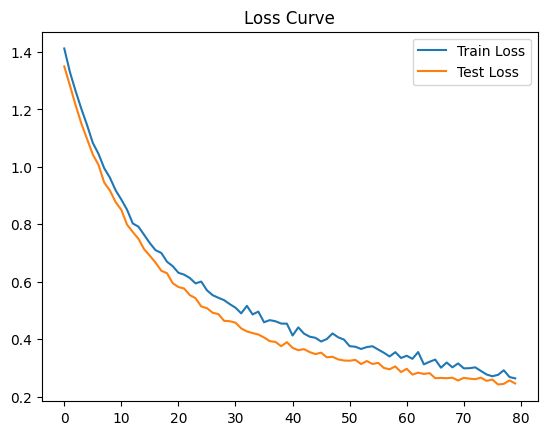

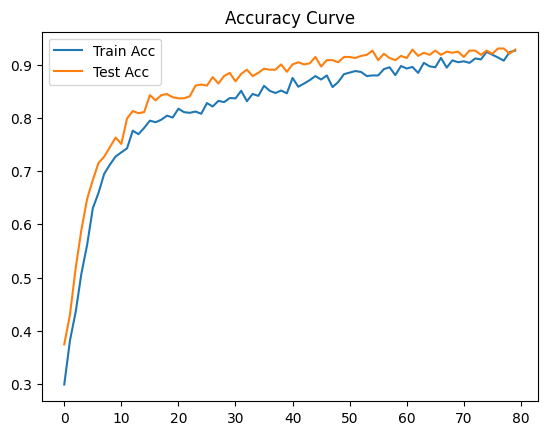

In [38]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

plt.plot(train_accuracies, label="Train Acc")
plt.plot(test_accuracies, label="Test Acc")
plt.legend()
plt.title("Accuracy Curve")
plt.show()


In [39]:
resnet_model = torch.load("best_resnet_model.h5")
print("✅ Loaded best model")
path = 'Tumour/test/glioma'
correct = 0
total = 0
resnet_model.eval()    
with torch.no_grad():
    for img_name in os.listdir(path):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(path, img_name)
            img = Image.open(img_path)
            img_tensor = test_transform(img).unsqueeze(0).to(device)
            output = resnet_model(img_tensor)
            _, predicted = torch.max(output, 1)
            predicted_class = class_names[predicted.item()]
            print(f'Image: {img_name}, Predicted class: {predicted_class}')
            if predicted_class == 'glioma':
                correct += 1
            total += 1
accuracy = 100 * correct / total if total > 0 else 0
print(f'Accuracy on glioma images: {accuracy:.2f}%')


C:\Users\Manan\AppData\Local\Temp\ipykernel_23104\3281755583.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet_model = torch.load("best_resnet_model.h5")


✅ Loaded best model
Image: Tr-gl_0016_jpg.rf.99746694ea97fe0b73108832b462d48e.jpg, Predicted class: glioma
Image: Tr-gl_0018_jpg.rf.7a670766b8083a1b516a49e241a636bc.jpg, Predicted class: glioma
Image: Tr-gl_0028_jpg.rf.8098b9737048aac0dccb1b7c45046894.jpg, Predicted class: glioma
Image: Tr-gl_0032_jpg.rf.e1e485b4f909d84c8e24cd26e0ad3c08.jpg, Predicted class: glioma
Image: Tr-gl_0035_jpg.rf.7a7c96ab2e6245cf42a0c86b97f81b3e.jpg, Predicted class: glioma
Image: Tr-gl_0037_jpg.rf.6ac80086817a5d840d3b634956299e40.jpg, Predicted class: glioma
Image: Tr-gl_0040_jpg.rf.4e8e95e2b510b798b62954aa8d3e1847.jpg, Predicted class: glioma
Image: Tr-gl_0042_jpg.rf.c825249fca17c0579976c6455ed0f64d.jpg, Predicted class: glioma
Image: Tr-gl_0075_jpg.rf.687ed8298bed6c85cb35c9c8f3ecbe2d.jpg, Predicted class: glioma
Image: Tr-gl_0081_jpg.rf.cd6ff4a250465f60361ab931fe2cd91f.jpg, Predicted class: glioma
Image: Tr-gl_0084_jpg.rf.a44aa8130cb9e42053acb60cbc60cb1e.jpg, Predicted class: glioma
Image: Tr-gl_0086_jpg.r

In [40]:
resnet_model.load_state_dict(torch.load("best_resnet_model.h5").state_dict())
print("✅ Loaded best model")
path = 'Tumour/test/pituitary'
correct = 0
total = 0
resnet_model.eval()    
with torch.no_grad():
    for img_name in os.listdir(path):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(path, img_name)
            img = Image.open(img_path)
            img_tensor = test_transform(img).unsqueeze(0).to(device)
            output = resnet_model(img_tensor)
            _, predicted = torch.max(output, 1)
            predicted_class = class_names[predicted.item()]
            print(f'Image: {img_name}, Predicted class: {predicted_class}')
            if predicted_class == 'pituitary':
                correct += 1
            total += 1
accuracy = 100 * correct / total if total > 0 else 0
print(f'Accuracy on pituitary images: {accuracy:.2f}%')


C:\Users\Manan\AppData\Local\Temp\ipykernel_23104\2966346080.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet_model.load_state_dict(torch.load("best_resnet_model.h

✅ Loaded best model
Image: Tr-pi_0038_jpg.rf.50c4875c32834d727e1b02ce11ca571b.jpg, Predicted class: pituitary
Image: Tr-pi_0090_jpg.rf.c08e55649aa763919fefc64964f2e6b4.jpg, Predicted class: pituitary
Image: Tr-pi_0098_jpg.rf.eec9da587fa75dd9a461ef02380e8225.jpg, Predicted class: pituitary
Image: Tr-pi_0103_jpg.rf.e4149a2b693bbe8fe259acbefc31cfc0.jpg, Predicted class: pituitary
Image: Tr-pi_0115_jpg.rf.23b8edbb6cef3898b66019cb8d1c8127.jpg, Predicted class: pituitary
Image: Tr-pi_0130_jpg.rf.15adee5c88949e10f62a9c54294adaf9.jpg, Predicted class: pituitary
Image: Tr-pi_0134_jpg.rf.fe52bea9481b28a403f0436ab88dafee.jpg, Predicted class: pituitary
Image: Tr-pi_0151_jpg.rf.29da072b2854ac8013c749591d2fa269.jpg, Predicted class: pituitary
Image: Tr-pi_0158_jpg.rf.e934d7a11ed39795f78dba33bcbdd3d2.jpg, Predicted class: pituitary
Image: Tr-pi_0190_jpg.rf.9c11456c61516da0b1d588c401d6c9cf.jpg, Predicted class: pituitary
Image: Tr-pi_0192_jpg.rf.7a829f518629b0cc146ab2ce78f739ba.jpg, Predicted class: 

In [41]:
resnet_model.load_state_dict(torch.load("best_resnet_model.h5").state_dict())
print("✅ Loaded best model")
path = 'Tumour/test/meningioma'
correct = 0
total = 0
resnet_model.eval()    
with torch.no_grad():
    for img_name in os.listdir(path):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(path, img_name)
            img = Image.open(img_path)
            img_tensor = test_transform(img).unsqueeze(0).to(device)
            output = resnet_model(img_tensor)
            _, predicted = torch.max(output, 1)
            predicted_class = class_names[predicted.item()]
            print(f'Image: {img_name}, Predicted class: {predicted_class}')
            if predicted_class == 'meningioma':
                correct += 1
            total += 1
accuracy = 100 * correct / total if total > 0 else 0
print(f'Accuracy on meningioma images: {accuracy:.2f}%')


C:\Users\Manan\AppData\Local\Temp\ipykernel_23104\3919926313.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet_model.load_state_dict(torch.load("best_resnet_model.h

✅ Loaded best model
Image: Tr-me_0010_jpg.rf.64b09cdfd6ad5f8352e473a7d3015dba.jpg, Predicted class: meningioma
Image: Tr-me_0035_jpg.rf.e4f21c06c7ce665e5258c3e0489185c5.jpg, Predicted class: glioma
Image: Tr-me_0041_jpg.rf.fd18fa5bcabe05b6cdd3987743a49315.jpg, Predicted class: meningioma
Image: Tr-me_0044_jpg.rf.0223369274dd825d3ff27ace105f878f.jpg, Predicted class: meningioma
Image: Tr-me_0046_jpg.rf.fb1ef3480d81c1063299a7a2eb723411.jpg, Predicted class: meningioma
Image: Tr-me_0059_jpg.rf.a7ddf325d1b4508eb5e9048c5cb9133d.jpg, Predicted class: pituitary
Image: Tr-me_0060_jpg.rf.00fc106bc4d8afdd87385a496cc62c2c.jpg, Predicted class: meningioma
Image: Tr-me_0069_jpg.rf.332331a0dda2f9e803c7bff6ad5ae3eb.jpg, Predicted class: meningioma
Image: Tr-me_0084_jpg.rf.8da0909e5ac2b199b846a7b8a7ae18d0.jpg, Predicted class: meningioma
Image: Tr-me_0088_jpg.rf.e61e56a612e513fe2556d7a23c910913.jpg, Predicted class: meningioma
Image: Tr-me_0095_jpg.rf.6bfd18915c4925497a3d61dfcba79d6b.jpg, Predicted cl

In [42]:
resnet_model.load_state_dict(torch.load("best_resnet_model.h5").state_dict())
print("✅ Loaded best model")
path = 'Tumour/test/no_tumor'
correct = 0
total = 0
resnet_model.eval()    
with torch.no_grad():
    for img_name in os.listdir(path):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(path, img_name)
            img = Image.open(img_path)
            img_tensor = test_transform(img).unsqueeze(0).to(device)
            output = resnet_model(img_tensor)
            _, predicted = torch.max(output, 1)
            predicted_class = class_names[predicted.item()]
            print(f'Image: {img_name}, Predicted class: {predicted_class}')
            if predicted_class == 'no_tumor':
                correct += 1
            total += 1
accuracy = 100 * correct / total if total > 0 else 0
print(f'Accuracy on no_tumor images: {accuracy:.2f}%')


C:\Users\Manan\AppData\Local\Temp\ipykernel_23104\646137753.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet_model.load_state_dict(torch.load("best_resnet_model.h5

✅ Loaded best model
Image: Tr-no_0017_jpg.rf.2cedc1f6703d5a0b33b09208957d9223.jpg, Predicted class: no_tumor
Image: Tr-no_0022_jpg.rf.450e5c79c994c8f3ccfd6e41b45147b6.jpg, Predicted class: no_tumor
Image: Tr-no_0032_jpg.rf.1d31f39f4254f6f632457fe7cf03ceef.jpg, Predicted class: no_tumor
Image: Tr-no_0043_jpg.rf.5224aefedc2bd0860814754ea61bb631.jpg, Predicted class: no_tumor
Image: Tr-no_0049_jpg.rf.ebfa4b818a60023078468e4a497d6b32.jpg, Predicted class: meningioma
Image: Tr-no_0055_jpg.rf.f1be184ee2cee634dd82670955bfba81.jpg, Predicted class: no_tumor
Image: Tr-no_0091_jpg.rf.3d049f5d6d7b909d8192f3cfa4a2b39f.jpg, Predicted class: glioma
Image: Tr-no_0102_jpg.rf.5dc9cb55c27336399cd0c9cf5219c497.jpg, Predicted class: no_tumor
Image: Tr-no_0108_jpg.rf.43faf021fc7d612544a9e52b4a5ae745.jpg, Predicted class: meningioma
Image: Tr-no_0133_jpg.rf.7adafcb0e41d35cee0a50459b6d60fc5.jpg, Predicted class: no_tumor
Image: Tr-no_0139_jpg.rf.51497327a9205e13b0b0477b6743efff.jpg, Predicted class: no_tumor

In [ ]:


model = torch.load("model_full.h5")
model.eval()
print("Model loaded from 'model_full.h5'")
path1 = r"C:\Users\Manan\Downloads\IM_00005q.tiff"
with torch.no_grad():
    img1 = Image.open(path1).convert('RGB')  # Converting grayscale to RGB
    img1_tensor = test_transform(img1).unsqueeze(0).to(device)  # Adding batch dimension and move to device
    output1 = model(img1_tensor)
    _, predicted1 = torch.max(output1, 1)
    predicted_class1 = class_names[predicted1.item()]
    print(f'Predicted class for {path1}: {predicted_class1}')


C:\Users\Manan\AppData\Local\Temp\ipykernel_23104\3454164492.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("model_full.h5")


Model loaded from 'model_full.h5'
Predicted class for C:\Users\Manan\Downloads\IM_00005q.tiff: meningioma
